# Overview

Learning note from [The Math Behind Neural Networks](https://medium.com/towards-data-science/the-math-behind-neural-networks-a34a51b93873).

Neural networks started with something called a percaptron in 1958, thanks to Frank Rosenblatt. Today we built more complex networks, like multi-layer perceptrons(MLPs), which has one or more hidden layers.


# Type of common Neural Networks

### Feedforward Neural Networks(FNN)

The Feedforward Neural Network is the simplest type. It's like a one-way street for data - information travels straight from the input, through any hidden layers, and out the other side to the output. **These networks are the go-to for simple predictions and sorting things into categories.**

### Convolutinal Neural Networks(CNN)

Computer vision.

### Long Short-Term Memory Networks(LSTM)

LSTMs are a special breed of RNNs built to remember things for longer streches. They'are desgined to solve the problem of RNNd forgetting stuff over long sequences.

### Generative Adversarial Networks(GAN)

Imagine two AIs in a cat-and-mouse game: one generates fakes data(like images), and the other tries to catch what's fake and what's real.


# The Architecture of Neural Networks

### The Structure of a Neuron

For each input, the neuron does a little math: it multiplies the input by a "weight" and then adds a "bias".

### Activation function

it add nonlinear to the neuron net, like ReLU, sigmoid and Tanh

### Layers

* Input layer
* Hidden layers
* Output layer

#### Output layer

The softmax function to give probabilities for each category in the final step. Output layer holds only one node normally is used for a regression task.


# The Mathmatics of Neural Networks

The first step in the neural computation process involves aggregating the inputs to a neuron, each multiplied by their respective weights, and then adding a bias term. It's called weighted sum or linear combination.

$$z=\sum_{i=1}^{n} w_{i}x_{i}+b$$

* $w_{i}$ represents the weight associated with the i-th input
* $x_{i}$ is the i-th input to the neuron


Z is the weighted sum. It's allows the network to perform a linear transformation of the inputs, adjusting the importance(weight) of each input in the neuron's output.


## Activation Functions

They are mathematical equations that determine whether a neuron should be activated or not. It introduce non-linear properties to the network, enabling it to learn complex data patterns and perform tasks beyond mere linear classification, which is essential for deep learning models.

### Sigmoid(for binary classification)

This function squeezes its input intot a narrow range between 0 and 1. It's like taking any value, no matter how large or small, and translating it into a probability.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png)

$$f(x)=\frac{1}{1+e^{-x}}$$

### Hyperbolic Tangent(tanh)

Tanh stretches the output range to between -1 and 1. This centers the data around 0, making it easier for layers down the line to learn from it.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Sinh_cosh_tanh.svg/300px-Sinh_cosh_tanh.svg.png)

$$f(x)=tanh(x)=\frac{2}{1+e^{-2x}}-1$$


### Rectified Linear Unit(ReLU)

ReLU is like a gatekeeper that passes psotive values unchanged but blocks nagtives, turning them to zero.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/ReLU_and_GELU.svg/220px-ReLU_and_GELU.svg.png)

$$f(x)=max(0,x)$$


### Leaky Rectified Linear Unit(Leaky ReLU)

Leaky ReLU allows a tiny, none-zero gradient when the input is less than zero, which keeps neurons alive and kicking even when the're not actively firing.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/120px-Activation_prelu.svg.png)

$$f(x)=max(\alpha x, x)$$

It's tweak to ReLU used in cases wher the network miht suffer from "dead neurons" ensuring all parts of the network stay active over time.


### Exponential Linear Unit(ELU)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Activation_elu.svg/120px-Activation_elu.svg.png)

$$f(x)=\begin{cases}\alpha \left(e^{x}-1\right)&{\text{if }}x\leq 0\\x&{\text{if }}x>0\end{cases}$$
 
 
### Softmax Function

The softmax function turns logits, the raw output socres from the neurons, into probabilities by exponentiating and normalizing them. It ensures that the output values sum up to one, makeing them directly interpretable as probabilities.

$$f(x)_{i}=\frac{e^{x}_{i}}{\sum_{j} e^{x}_{j}}$$


## Backpropagation(Backword propagation of errors)

It's a method for efficiently calculating the gradient of the loss function concerning all weights in the network. It consists of two main phases:


### Forward pass

The intput data is passed through the network to generate an output


### Backward pass

The ouptut is compared to the target value, and the error is propagated back through the network to update the weights.

**The essence of backpropagation is the chain rule of calculus, which is used to calcualte the gradients of the loss function for each weight by multiplying the gradients of the layers behind it.** 

$$\frac{\alpha L}{\alpha w}=\frac{\alpha L}{\alpha a}* \frac{\alpha a}{\alpha z} * \frac{\alpha z}{\alpha w}$$

where:
* $\frac{\alpha a}{\alpha L}$ is the gradient of the loss function to the activation
* $\frac{\alpha z}{\alpha a}$ is the gradient of the activation function tot he weighted input z
* $\frac{\alpha w}{\alpha z}$ is the gradient of thr weighted input to the weight w
* z represents the weighted sum of inputs and a is the activation

### Gradient descent: Optimizing the weights

Gradient descent is an optimization algorithm used for minimizing the loss function in a neural network. It works by iteratively mocing the weights in the direction of the steepest decrease in loss. The amount by which the weights are adjusted in each iteration is determined by the learning rate, a hyperparameter that controls the size of the steps.

$$w_{new}=w_{old}-\eta*\frac{\alpha L}{\alpha w}$$

* $w_{new}$ and $w_{old}$ represent the updated(new) and current(old) values of the weight, respectively.
* $\eta$ is the learning rate, a hyperparmeter that controls the size of the step taken in the direction of the negative gradient.
* $\alpha w/\alpha L$ is the gradient of the loss function for the weight


In the practice, backpropagation and gradient descent are perfomed in tandem. Backpropagation computes the gradient(the direction and magnitude of the error) for each weight in the network, and gradient descent uses this information to update the weights to minimize the loss.


# Improvements of Gradient Descent


## Stochastic Gradient Descent(SGD)

This method is similar to making decisions based on quick, individual observations rather than waiting to gather everyone's opinion.


## Adam(Adaptive Moment Estimation)

It combines ideas from two other gradient descent improvements, AdaGrad and RMSProp, to adapt the learning rate for each weight in the network based on the first(mean) and second(uncentered variance) moments of the gradient.

In [1]:
import numpy as np


class SimpleNN:
    """
    A simple neural network with one hidden layer.

    Parameters:
    -----------
    input_size: int
        The number of input features
    hidden_size: int
        The number of neurons in the hidden layer
    output_size: int
        The number of neurons in the output layer
    loss_func: str
        The loss function to use. Options are 'mse' for mean squared error, 'log_loss' for logistic loss, and 'categorical_crossentropy' for categorical crossentropy.
    """
    def __init__(self, input_size, hidden_size, output_size, loss_func='mse'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.loss_func = loss_func
        
        # Initialize weights and biases
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.bias1 = np.zeros((1, self.hidden_size))
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias2 = np.zeros((1, self.output_size))

        # track loss
        self.train_loss = []
        self.test_loss = []

    def __str__(self):
        """
        Print the neural network architecture.
        """
        return f"Neural Network Layout:\nInput Layer: {self.input_size} neurons\nHidden Layer: {self.hidden_size} neurons\nOutput Layer: {self.output_size} neurons\nLoss Function: {self.loss_func}"
        
    def forward(self, X):
        """
        Perform forward propagation.
        
        Parameters:
        -----------
        X: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The predicted output
        """
        # Perform forward propagation
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        if self.loss_func == 'categorical_crossentropy':
            self.a2 = self.softmax(self.z2)
        else:
            self.a2 = self.sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, learning_rate):
        """
        Perform backpropagation.

        Parameters:
        -----------
        X: numpy array
            The input data
        y: numpy array
            The target output
        learning_rate: float
            The learning rate
        """
        # Perform backpropagation
        m = X.shape[0]
        
        # Calculate gradients
        if self.loss_func == 'mse':
            self.dz2 = self.a2 - y
        elif self.loss_func == 'log_loss':
            self.dz2 = -(y/self.a2 - (1-y)/(1-self.a2))
        elif self.loss_func == 'categorical_crossentropy':
            self.dz2 = self.a2 - y
        else:
            raise ValueError('Invalid loss function')
        
        self.dw2 = (1 / m) * np.dot(self.a1.T, self.dz2)
        self.db2 = (1 / m) * np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.weights2.T) * self.sigmoid_derivative(self.a1)
        self.dw1 = (1 / m) * np.dot(X.T, self.dz1)
        self.db1 = (1 / m) * np.sum(self.dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.weights2 -= learning_rate * self.dw2
        self.bias2 -= learning_rate * self.db2
        self.weights1 -= learning_rate * self.dw1
        self.bias1 -= learning_rate * self.db1
        
    def sigmoid(self, x):
        """
        Sigmoid activation function.
        
        Parameters:
        -----------
        x: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The output of the sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        """
        Derivative of the sigmoid activation function.

        Parameters:
        -----------
        x: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The output of the derivative of the sigmoid function
        """
        return x * (1 - x)
    
    def softmax(self, x):
        """
        Softmax activation function.

        Parameters:
        -----------
        x: numpy array
            The input data
        
        Returns:
        --------
        numpy array
            The output of the softmax function
        """
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)

# Define trainer

In [2]:
class Trainer:
    """
    A class to train a neural network.

    Parameters:
    -----------
    model: NeuralNetwork
        The neural network model to train
    loss_func: str
        The loss function to use. Options are 'mse' for mean squared error, 'log_loss' for logistic loss, and 'categorical_crossentropy' for categorical crossentropy.
    """
    def __init__(self, model, loss_func='mse'):
        self.model = model
        self.loss_func = loss_func
        self.train_loss = []
        self.test_loss = []

    def calculate_loss(self, y_true, y_pred):
        """
        Calculate the loss.

        Parameters:
        -----------
        y_true: numpy array
            The true output
        y_pred: numpy array
            The predicted output
        
        Returns:
        --------
        float
            The loss
        """
        if self.loss_func == 'mse':
            return np.mean((y_pred - y_true)**2)
        elif self.loss_func == 'log_loss':
            return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
        elif self.loss_func == 'categorical_crossentropy':
            return -np.mean(y_true*np.log(y_pred))
        else:
            raise ValueError('Invalid loss function')

    def train(self, X_train, y_train, X_test, y_test, epochs, learning_rate):
        """
        Train the neural network.

        Parameters:
        -----------
        X_train: numpy array
            The training input data
        y_train: numpy array
            The training target output
        X_test: numpy array
            The test input data
        y_test: numpy array
            The test target output
        epochs: int
            The number of epochs to train the model
        learning_rate: float
            The learning rate
        """
        for _ in range(epochs):
            self.model.forward(X_train)
            self.model.backward(X_train, y_train, learning_rate)
            train_loss = self.calculate_loss(y_train, self.model.a2)
            self.train_loss.append(train_loss)
            
            self.model.forward(X_test)
            test_loss = self.calculate_loss(y_test, self.model.a2)
            self.test_loss.append(test_loss)

# Load dataset

In [3]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # normalization
from sklearn.preprocessing import OneHotEncoder # for one hot encodign

import optuna # for hyperparameter tuning

import warnings
warnings.filterwarnings("ignore")

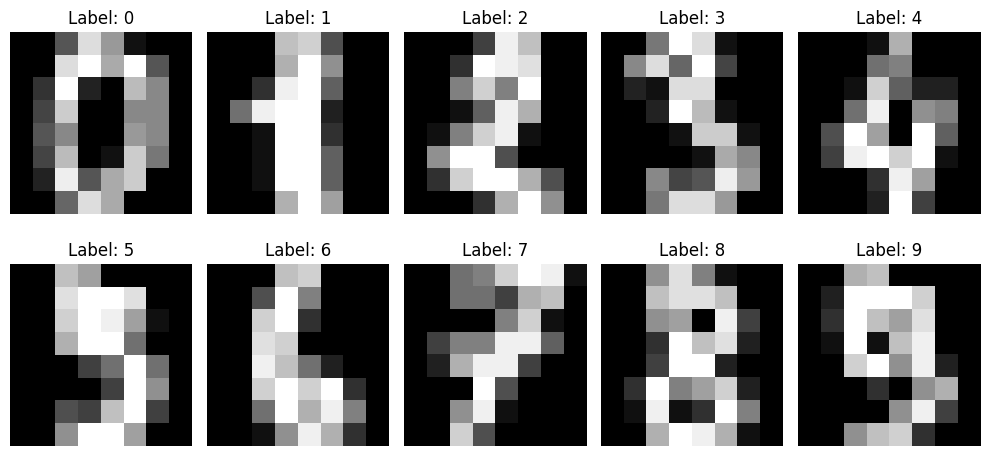

In [4]:
# load the digits dataset
digits=load_digits()

# plot the first 10 images
fig, axes=plt.subplots(2,5,figsize=(10,5))
axes=axes.ravel()

for i in range(10):
    axes[i].imshow(digits.images[i], cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"Label: {digits.target[i]}")

plt.tight_layout()
plt.show()

# Data Preprocessing

In [5]:
# Preprocess the dataset

scaler=MinMaxScaler()
X=scaler.fit_transform(digits.data)
y=digits.target

# One-hot encode the target output
encoder=OneHotEncoder(sparse=False)
y_onehot=encoder.fit_transform(y.reshape(-1,1))

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Create Neural Network

In [6]:
# Create an instance of the NeuralNetwork class
input_size = X.shape[1]
hidden_size = 64
output_size = len(np.unique(y))
loss_func = 'categorical_crossentropy'
epochs = 1000
learning_rate = 0.1

math_model = SimpleNN(input_size, hidden_size, output_size, loss_func)

# Print the neural network artchitecture
print(math_model)

Neural Network Layout:
Input Layer: 64 neurons
Hidden Layer: 64 neurons
Output Layer: 10 neurons
Loss Function: categorical_crossentropy


# Train model

In [7]:
trainer=Trainer(math_model, loss_func)
trainer.train(X_train, y_train, X_test, y_test, epochs, learning_rate)

# Convert y_test from one-hot encoding to labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate the performance of the neural network
predictions = np.argmax(math_model.forward(X_test), axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 93.61%


# Visualization loss

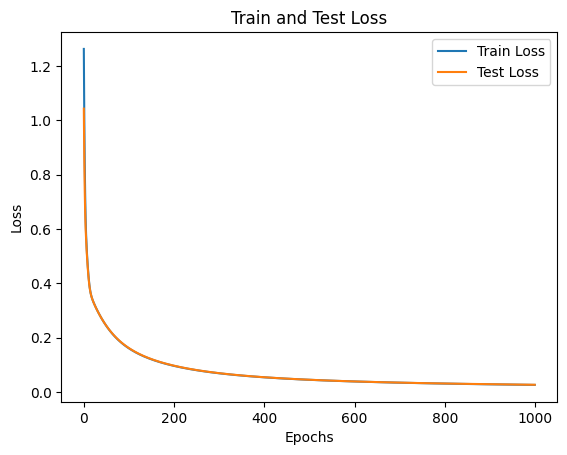

In [8]:
plt.plot(trainer.train_loss, label='Train Loss')
plt.plot(trainer.test_loss, label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Hyperparameter optimization 

In [9]:
def objective(trial):
    # Define hyperparameters
    hidden_size = trial.suggest_int('hidden_size', 32, 128)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    epochs = trial.suggest_int('epochs', 500, 10000)

    # Create and train the neural network
    nn = SimpleNN(input_size, hidden_size, output_size, loss_func)
    trainer = Trainer(nn, loss_func)
    trainer.train(X_train, y_train, X_test, y_test, epochs, learning_rate)

    # Evaluate the performance of the neural network
    predictions = np.argmax(nn.forward(X_test), axis=1)
    accuracy = np.mean(predictions == y_test_labels)

    return accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(study_name='nn_study', direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best hyperparameters
print(f"Best trial: {study.best_trial.params}")
print(f"Best value: {study.best_trial.value}")

[I 2024-08-21 05:06:12,889] A new study created in memory with name: nn_study
[I 2024-08-21 05:06:21,401] Trial 0 finished with value: 0.16944444444444445 and parameters: {'hidden_size': 36, 'learning_rate': 0.00019725985501801944, 'epochs': 1160}. Best is trial 0 with value: 0.16944444444444445.
[I 2024-08-21 05:07:13,578] Trial 1 finished with value: 0.9555555555555556 and parameters: {'hidden_size': 39, 'learning_rate': 0.03512472589423577, 'epochs': 6608}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-08-21 05:08:58,225] Trial 2 finished with value: 0.875 and parameters: {'hidden_size': 91, 'learning_rate': 0.00403543832906102, 'epochs': 7837}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-08-21 05:09:28,167] Trial 3 finished with value: 0.1361111111111111 and parameters: {'hidden_size': 83, 'learning_rate': 0.0011850564452949117, 'epochs': 2339}. Best is trial 1 with value: 0.9555555555555556.
[I 2024-08-21 05:11:34,768] Trial 4 finished with value: 0.105555555

Best trial: {'hidden_size': 39, 'learning_rate': 0.03512472589423577, 'epochs': 6608}
Best value: 0.9555555555555556


# Prediction

In [10]:
best_nn = SimpleNN(input_size, study.best_trial.params['hidden_size'], output_size, loss_func)
best_trainer = Trainer(best_nn, loss_func)
best_trainer.train(X_train, y_train, X_test, y_test, study.best_trial.params['epochs'], study.best_trial.params['learning_rate'])

# Evaluate the performance of the best neural network
predictions = np.argmax(best_nn.forward(X_test), axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f"Best accuracy: {accuracy:.2%}")

Best accuracy: 95.00%


# Acknowledgements

* https://en.wikipedia.org/wiki/Activation_function
* https://medium.com/towards-data-science/the-math-behind-neural-networks-a34a51b93873